<a href="https://colab.research.google.com/github/Sofia-Morales/Mineria-de-Datos/blob/master/Hongos_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,silhouette_score
from sklearn.cluster import KMeans
%matplotlib inline

Importar Archivo

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving mushrooms.csv to mushrooms (2).csv


In [ ]:
!ls

'mushrooms (1).csv'  'mushrooms (2).csv'   mushrooms.csv   sample_data


In [ ]:
uploaded

{'mushrooms.csv': b'class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat\np,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u\ne,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g\ne,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m\np,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u\ne,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g\ne,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g\ne,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m\ne,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m\np,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g\ne,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m\ne,x,y,y,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,n,n,g\ne,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,s,m\ne,b,s,y,t,a,f,c,b,w,e,c,s,s,w,w,p,w,o,p,n,s,g\np,x,y,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,v,u\ne,x,f,n,f,n,f,w,b,n,t

Cambiar nuestro archivo a un DataFrame

In [ ]:
path='mushrooms.csv'
df = pd.read_csv(path)
type(df)

pandas.core.frame.DataFrame

Vista preeliminar de nuestro DataFrame

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.shape

(8124, 23)

Reenombramos las variables

In [ ]:
values={"e":"edible","p":"poisonous"}
df["class"]=df["class"].replace(values)
values={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
df["cap-shape"]=df["cap-shape"].replace(values)
values2={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
df["cap-surface"]=df["cap-surface"].replace(values2)
values3={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["cap-color"]=df["cap-color"].replace(values3)
values4={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
df["odor"]=df["odor"].replace(values4)
values5={"a":"attached","f":"free"}
df["gill-attachment"]=df["gill-attachment"].replace(values5)
values6={"c":"close","w":"crowded"}
df["gill-spacing"]=df["gill-spacing"].replace(values6)
values7={"b":"broad","n":"narrow"}
df["gill-size"]=df["gill-size"].replace(values7)
values8={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["gill-color"]=df["gill-color"].replace(values8)
values9={"t":"tapering","e":"enlarging"}
df["stalk-shape"]=df["stalk-shape"].replace(values9)
values10={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
df["stalk-root"]=df["stalk-root"].replace(values10)
values11={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
df["stalk-surface-above-ring"]=df["stalk-surface-above-ring"].replace(values11)
df["stalk-surface-below-ring"]=df["stalk-surface-below-ring"].replace(values11)
values12={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
df["stalk-color-above-ring"]=df["stalk-color-above-ring"].replace(values12)
df["stalk-color-below-ring"]=df["stalk-color-below-ring"].replace(values12)
veil_type={"p":"partial","u":"universal"} 
df["veil-type"]=df["veil-type"].replace(veil_type)
veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
df["veil-color"]=df["veil-color"].replace(veil_color)
ring_number= {"n":"none","o":"one","t":"two"}
df["ring-number"]=df["ring-number"].replace(ring_number)
ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
df["ring-type"]=df["ring-type"].replace(ring_type)
spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
df["spore-print-color"]=df["spore-print-color"].replace(spore_print_color)
population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
df["population"]=df["population"].replace(population)
habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
df["habitat"]=df["habitat"].replace(habitat)
bruises={"t":"bruises","f":"no"}
df["bruises"]=df["bruises"].replace(bruises)

Nueva vista de nuestro DataFrame

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.shape[0]

8124

In [ ]:
df.shape[1]

23

In [ ]:
df.columns.values.tolist()

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [ ]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Verificamos que no existan campos nulos

In [ ]:
df.isnull().any().any()

False

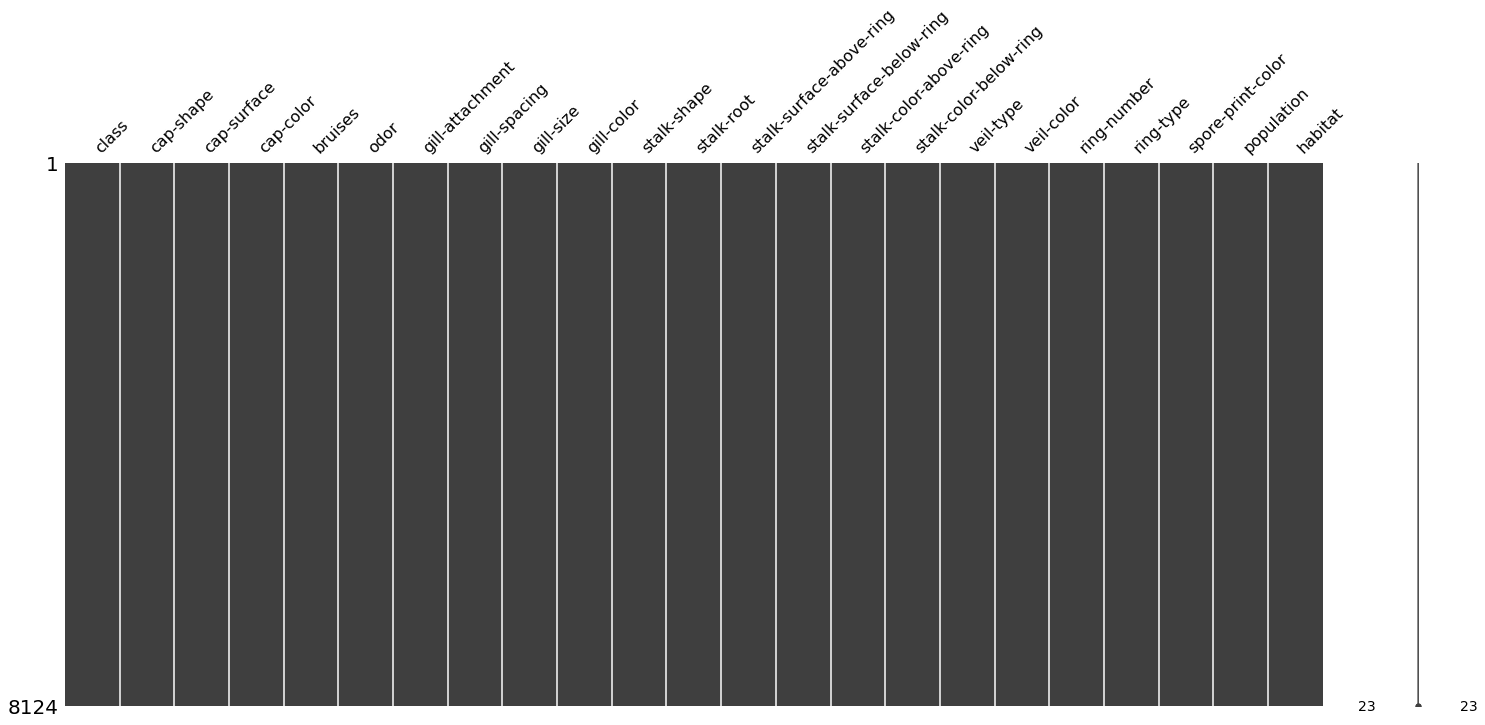

In [ ]:
msno.matrix(df)

In [ ]:
df.replace({' ': np.nan}, inplace=True)

In [ ]:
df.isnull().any().any()

False

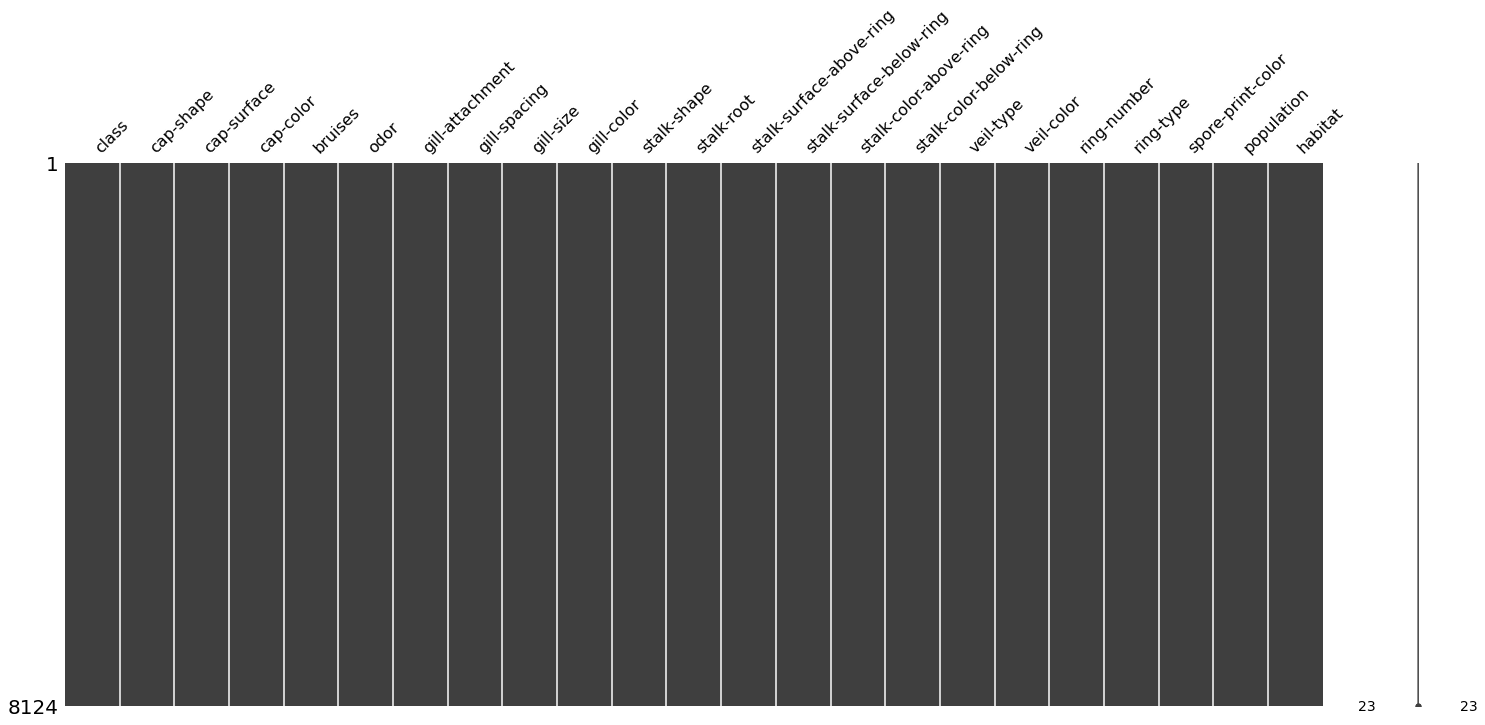

In [ ]:
msno.matrix(df)

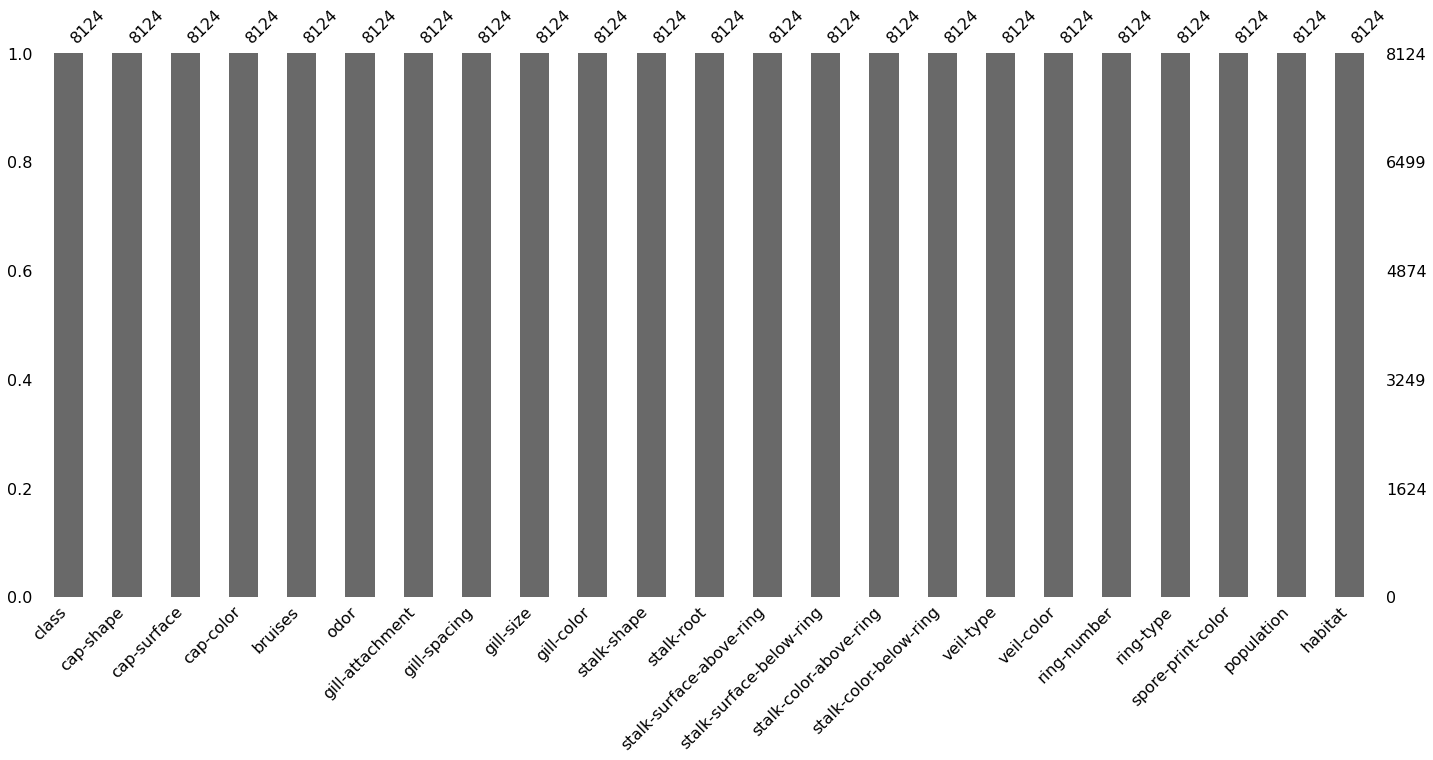

In [ ]:
msno.bar(df)

In [ ]:
df.columns[df.isnull().any()].tolist()

[]

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,tapering,bulbous,smooth,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.loc[[0]]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban


In [ ]:
df.odor.loc[[2000]]

2000    none
Name: odor, dtype: object

In [ ]:
df["odor"].loc[[3000]]

3000    none
Name: odor, dtype: object

In [ ]:
df.loc[30:33]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
30,edible,bell,smooth,yellow,bruises,anise,free,close,broad,gray,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
31,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,brown,scattered,urban
32,edible,convex,scaly,yellow,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
33,edible,convex,scaly,brown,bruises,anise,free,close,broad,pink,enlarging,rooted,smooth,scaly,white,white,partial,white,one,pendant,brown,solitary,paths


In [ ]:
df.drop([0,24,51], axis=0).head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
5,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,black,numerous,grasses


In [ ]:
df.drop(df.index[1:5], axis=0).head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
5,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
6,edible,bell,smooth,white,bruises,almond,free,close,broad,gray,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,black,numerous,meadows
7,edible,bell,scaly,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
8,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,pink,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,several,grasses
9,edible,bell,smooth,yellow,bruises,almond,free,close,broad,gray,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,meadows
10,edible,convex,scaly,yellow,bruises,anise,free,close,broad,gray,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
11,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,meadows
12,edible,bell,smooth,yellow,bruises,almond,free,close,broad,white,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,scattered,grasses
13,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,brown,several,urban


In [ ]:
df[100:].head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
100,edible,convex,fibrous,brown,no,none,free,crowded,broad,pink,tapering,equal,fibrous,smooth,white,white,partial,white,one,evanescent,black,scattered,grasses
101,edible,bell,smooth,yellow,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
102,edible,flat,scaly,yellow,bruises,anise,free,close,broad,white,enlarging,rooted,smooth,scaly,white,white,partial,white,one,pendant,brown,scattered,grasses
103,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,enlarging,rooted,smooth,scaly,white,white,partial,white,one,pendant,black,solitary,paths
104,edible,bell,scaly,white,bruises,anise,free,close,broad,gray,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses


In [ ]:
df.bruises.values

array(['bruises', 'bruises', 'bruises', ..., 'no', 'no', 'no'],
      dtype=object)

In [ ]:
df[['class', "bruises"]].values

array([['poisonous', 'bruises'],
       ['edible', 'bruises'],
       ['edible', 'bruises'],
       ...,
       ['edible', 'no'],
       ['poisonous', 'no'],
       ['edible', 'no']], dtype=object)

Habitat únicos de nuestro DataFrame

In [ ]:
df.habitat.unique()

array(['urban', 'grasses', 'meadows', 'woods', 'paths', 'waste', 'leaves'],
      dtype=object)

In [ ]:
df.habitat.nunique()

7

In [ ]:
df.habitat.value_counts()

woods      3148
grasses    2148
paths      1144
leaves      832
urban       368
meadows     292
waste       192
Name: habitat, dtype: int64

In [ ]:
df.agg(['count', 'size', 'nunique'])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
size,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
nunique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7


Queremos saber cuantos hongos existen en cada clase

In [ ]:
df.groupby('class').agg(['count', 'size', 'nunique']).stack()

cap-shape  cap-surface  ...  population  habitat
class                                      ...                     
edible    count         4208         4208  ...        4208     4208
          size          4208         4208  ...        4208     4208
          nunique          5            3  ...           6        7
poisonous count         3916         3916  ...        3916     3916
          size          3916         3916  ...        3916     3916
          nunique          5            4  ...           4        6

[6 rows x 22 columns]

In [ ]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1392,edible,flat,smooth,white,no,none,free,crowded,broad,chocolate,tapering,equal,fibrous,fibrous,white,white,partial,white,one,evanescent,black,abundant,grasses
4051,poisonous,convex,fibrous,pink,no,creosote,free,crowded,narrow,purple,enlarging,bulbous,smooth,smooth,white,white,partial,white,one,pendant,brown,several,woods
3725,poisonous,convex,smooth,white,no,creosote,free,crowded,narrow,gray,enlarging,bulbous,smooth,smooth,white,white,partial,white,one,pendant,brown,several,woods
7177,poisonous,knobbed,smooth,brown,no,foul,free,close,narrow,buff,tapering,missing,silky,silky,pink,white,partial,white,one,evanescent,white,several,leaves
103,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,enlarging,rooted,smooth,scaly,white,white,partial,white,one,pendant,black,solitary,paths


In [ ]:
df.shape

(8124, 23)

In [ ]:
df_sample.shape

(406, 23)

In [ ]:
df_copy = df.copy()
df_copy.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [ ]:
df_copy.shape

(8124, 23)

In [ ]:
df_copy.agg(['count', 'size', 'nunique'])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
size,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
nunique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7


In [ ]:
list(df['habitat'].unique())

['urban', 'grasses', 'meadows', 'woods', 'paths', 'waste', 'leaves']

In [ ]:
keys = list(df['habitat'].unique())
vals = range(1,8)
act = dict(zip(keys, vals))
act

{'grasses': 2,
 'leaves': 7,
 'meadows': 3,
 'paths': 5,
 'urban': 1,
 'waste': 6,
 'woods': 4}

In [ ]:
df_copy['habitat_cat'] = df['habitat'].map(act)
df_copy.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,habitat_cat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban,1
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses,2
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows,3
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban,1
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses,2


In [ ]:
list(df_copy['habitat_cat'].unique())

[1, 2, 3, 4, 5, 6, 7]

In [ ]:
df_copy['class'][df_copy['habitat_cat'] == 1]

0       poisonous
3       poisonous
13      poisonous
15         edible
18      poisonous
          ...    
5946    poisonous
5975    poisonous
5981    poisonous
5988    poisonous
5998    poisonous
Name: class, Length: 368, dtype: object

In [ ]:
df_copy.groupby(["class", "odor", "habitat"]).count()

cap-shape  cap-surface  ...  population  habitat_cat
class     odor     habitat                          ...                         
edible    almond   grasses        176          176  ...         176          176
                   meadows        128          128  ...         128          128
                   paths           48           48  ...          48           48
                   woods           48           48  ...          48           48
          anise    grasses        176          176  ...         176          176
                   meadows        128          128  ...         128          128
                   paths           48           48  ...          48           48
                   woods           48           48  ...          48           48
          none     grasses       1056         1056  ...        1056         1056
                   leaves         240          240  ...         240          240
                   paths           40           40  ...          40           40
                   urban           96           96  ...          96           96
                   waste          192          192  ...         192          192
                   woods         1784         1784  ...        1784         1784
poisonous creosote woods          192          192  ...         192          192
          fishy    leaves         192          192  ...         192          192
                   paths          192          192  ...         192          192
                   woods          192          192  ...         192          192
          foul     grasses        576          576  ...         576          576
                   leaves         192          192  ...         192          192
                   paths          624          624  ...         624          624
                   urban          144          144  ...         144          144
                   woods          624          624  ...         624          624
          musty    woods           36           36  ...          36           36
          none     grasses         36           36  ...          36           36
                   leaves          16           16  ...          16           16
                   meadows         36           36  ...          36           36
                   woods           32           32  ...          32           32
          pungent  grasses        128          128  ...         128          128
                   urban          128          128  ...         128          128
          spicy    leaves         192          192  ...         192          192
                   paths          192          192  ...         192          192
                   woods          192          192  ...         192          192

[33 rows x 21 columns]

In [ ]:
df_copy.groupby(["class", "odor"])[["habitat"]].count()

habitat
class     odor             
edible    almond        400
          anise         400
          none         3408
poisonous creosote      192
          fishy         576
          foul         2160
          musty          36
          none          120
          pungent       256
          spicy         576

In [ ]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1392,edible,flat,smooth,white,no,none,free,crowded,broad,chocolate,tapering,equal,fibrous,fibrous,white,white,partial,white,one,evanescent,black,abundant,grasses
4051,poisonous,convex,fibrous,pink,no,creosote,free,crowded,narrow,purple,enlarging,bulbous,smooth,smooth,white,white,partial,white,one,pendant,brown,several,woods
3725,poisonous,convex,smooth,white,no,creosote,free,crowded,narrow,gray,enlarging,bulbous,smooth,smooth,white,white,partial,white,one,pendant,brown,several,woods
7177,poisonous,knobbed,smooth,brown,no,foul,free,close,narrow,buff,tapering,missing,silky,silky,pink,white,partial,white,one,evanescent,white,several,leaves
103,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,enlarging,rooted,smooth,scaly,white,white,partial,white,one,pendant,black,solitary,paths


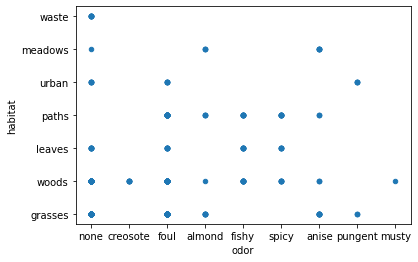

In [ ]:
df_sample['odor'] = df_sample['odor'].astype('object')

df_sample.plot(kind='scatter',x='odor',y='habitat')

Text(0.5, 1.0, 'Frequency of class')

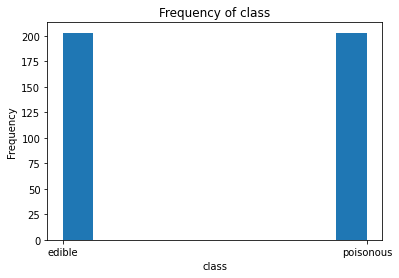

In [ ]:
plt.hist(df_sample['class'])
plt.xlabel('class')
plt.ylabel('Frequency')
plt.title('Frequency of class')

Text(0.5, 1.0, 'Frequency of habitat')

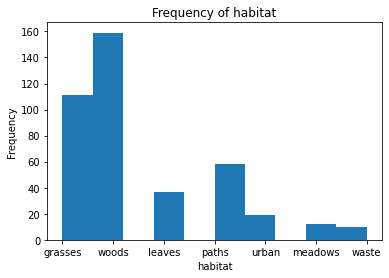

In [ ]:
plt.hist(df_sample['habitat'])
plt.xlabel('habitat')
plt.ylabel('Frequency')
plt.title('Frequency of habitat')

In [ ]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,0,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,0,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,1,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,0,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [ ]:
encoded_df = pd.get_dummies(df)
encoded_df.head(5)

,class,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_brown,cap-color_buff,cap-color_cinnamon,cap-color_gray,cap-color_green,cap-color_pink,cap-color_purple,cap-color_red,cap-color_white,cap-color_yellow,bruises_bruises,bruises_no,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,gill-attachment_attached,gill-attachment_free,gill-spacing_close,gill-spacing_crowded,gill-size_broad,gill-size_narrow,gill-color_black,gill-color_brown,...,stalk-color-below-ring_orange,stalk-color-below-ring_pink,stalk-color-below-ring_red,stalk-color-below-ring_white,stalk-color-below-ring_yellow,veil-type_partial,veil-color_brown,veil-color_orange,veil-color_white,veil-color_yellow,ring-number_none,ring-number_one,ring-number_two,ring-type_evanescent,ring-type_flaring,ring-type_large,ring-type_none,ring-type_pendant,spore-print-color_black,spore-print-color_brown,spore-print-color_buff,spore-print-color_chocolate,spore-print-color_green,spore-print-color_orange,spore-print-color_purple,spore-print-color_white,spore-print-color_yellow,population_abundant,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
encoded_df.tail(5)

,class,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_brown,cap-color_buff,cap-color_cinnamon,cap-color_gray,cap-color_green,cap-color_pink,cap-color_purple,cap-color_red,cap-color_white,cap-color_yellow,bruises_bruises,bruises_no,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,gill-attachment_attached,gill-attachment_free,gill-spacing_close,gill-spacing_crowded,gill-size_broad,gill-size_narrow,gill-color_black,gill-color_brown,...,stalk-color-below-ring_orange,stalk-color-below-ring_pink,stalk-color-below-ring_red,stalk-color-below-ring_white,stalk-color-below-ring_yellow,veil-type_partial,veil-color_brown,veil-color_orange,veil-color_white,veil-color_yellow,ring-number_none,ring-number_one,ring-number_two,ring-type_evanescent,ring-type_flaring,ring-type_large,ring-type_none,ring-type_pendant,spore-print-color_black,spore-print-color_brown,spore-print-color_buff,spore-print-color_chocolate,spore-print-color_green,spore-print-color_orange,spore-print-color_purple,spore-print-color_white,spore-print-color_yellow,population_abundant,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
8119,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8120,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8121,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8122,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8123,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
y = df['class'].values.reshape(-1, 1)
X = encoded_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logistc_reg = LogisticRegression()

In [ ]:
logistc_reg.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_prob = logistc_reg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)

In [ ]:
y_prob

array([1.69315523e-04, 9.99039909e-01, 9.99796223e-01, ...,
       9.99909212e-01, 9.99114242e-01, 9.98515662e-01])

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)

confusion_matrix

array([[843,   0],
       [  0, 782]])

In [ ]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

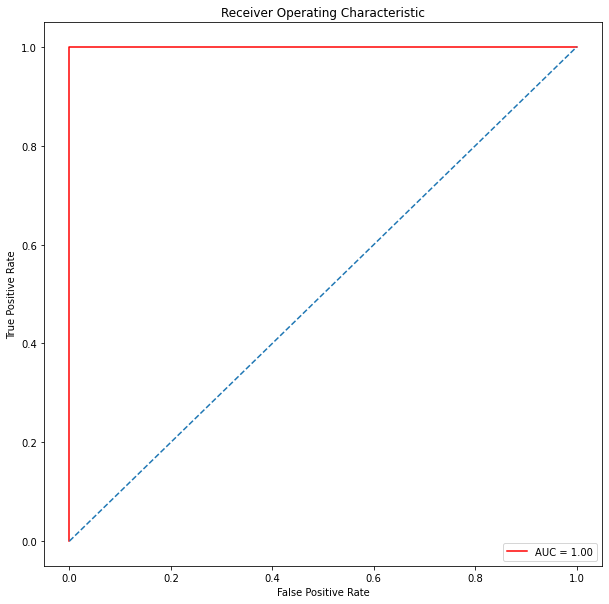

In [ ]:
def plot_roc(roc_auc):
    plt.figure(figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
plot_roc(roc_auc)

In [ ]:
Suma_de_distancias_cuadradas = []
K = range(1,15)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(encoded_df)
    Suma_de_distancias_cuadradas.append(km.inertia_)

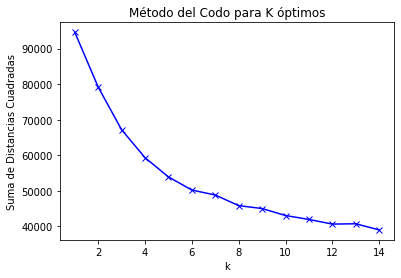

In [ ]:
plt.plot(K,Suma_de_distancias_cuadradas, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma de Distancias Cuadradas')
plt.title('Método del Codo para K óptimos')
plt.show()

In [ ]:
kmeans = KMeans(
    init = 'k-means++',
    n_clusters = 6, 
    n_init = 10,
    max_iter =300,
    random_state = None
)